In [3]:
# Step1: getting started


# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Allow the use of display() for DataFrames
from IPython.display import display

# Import supplementary visulizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

#
# Print the first few entries of the RMS Titanic data
display(full_data.head())



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Remove "Survived" feature from this dataset to make my machine learning model

outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset without "Survived"
display(data.head())


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:

# Need a metric to score our predictions against the true outcomes of survival 
# Let's start from a small proportion on first five passengers


def accuracy_score(truth, pred):
    
#     ensure that the number of predictions matches numbers of outcomes
    if len(truth) == len(pred):
        
#         Calculate and return accuracy as a percentage
        return "Predictions have an accuracy of {:.2f}%".format((truth == pred).mean()*100)
    
    
    else:
        
        return "Number of predictions does not match number of outcomes!"
        
    
    
# Test accuracy_score function
predictions = pd.Series(np.ones(5,dtype = int))
print accuracy_score(outcomes[:5], predictions)




Predictions have an accuracy of 60.00%


In [5]:
# Step2: making predictions

# For unknown passengers, we assume they did not survive. Cuz the majority, >50%, did not survive the ship sinking. 


# The prediction_0 function below will always predict that a passenger did not survive. 

def predictions_0(data):
    
    predictions = []
    
    for _, passenger in data.iterrows():
        
#         Prediction the survival of 'passenger'
        predictions.append(0)
    
#     return our predictions
    return pd.Series(predictions)


# Make the predictions
predictions = predictions_0(data)


In [6]:

# Question1: using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?


In [7]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 61.62%


In [8]:

#Answer to the Question1: 
# ==> "Predictions have an accuracy of 61.62%"


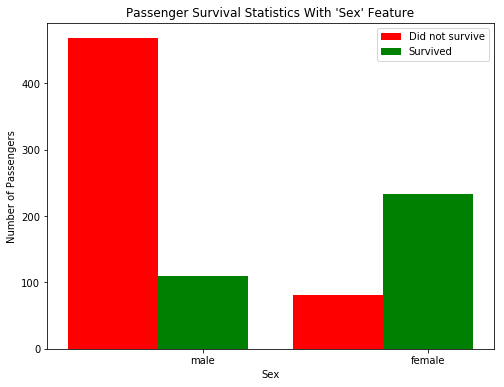

In [9]:
# Let's check how feature Sex affecting the survival rate, using survival_stats function

vs.survival_stats(data, outcomes, 'Sex')


In [10]:
# Female survived more than male,
# so, let's build on our previous prediction: if a messenger was female, then we will predict that they survived,
# Ohterwise, we will predict the passenger did not survive. 

In [478]:
def predictions_1(data):
    
    predictions = []
    
    for _, passenger in data.iterrows():
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
#   return predictions
    return pd.Series(predictions)

    
# make the predictions
predictions = predictions_1(data)
    

In [479]:
# Question2: how accurate would a prediction be that 
# all female passengers survived and the remaining passengers did not survive?

In [480]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 78.68%


In [481]:
# Answer to the Question2:
# ==> "Predictions have an accuracy of 78.68%" 
# Uhmm, interesting, I started to enjoy ML after I saw my accuracy improving. 

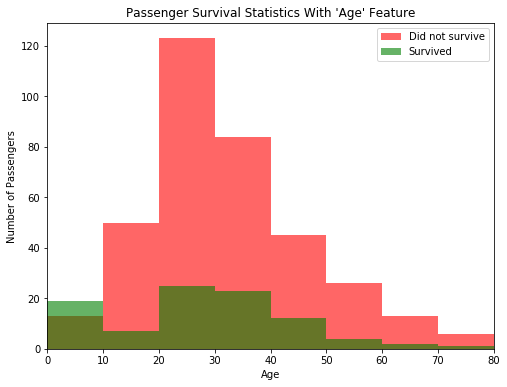

In [482]:
# Sex feature for each passenger really improved my model's accuracy. 
# What if we add more features to improve the accuracy? Fun
# Which subset of the passengers might have a higer suvival rate? What about Age of each male. 

# vs.survival_stats(data, outcomes, 'Age', ['Sex'] == 'male') ==>What?Why?
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])


In [483]:
# Let's keep going. Continue to build on our previous prediction:
# if a passenger was female, then we will predict they survive;
# if a passenger was male and younger than 10, then we will predict they survive; otherwise they won't.


def predictions_2(data):
    
    predictions = []
    
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
        elif passenger['Sex'] == 'male' and passenger['Age'] < 10:
            predictions.append(1)
        else:
            predictions.append(0)
#   Return the predictions
    return pd.Series(predictions)

#  Make the predicitons
predictions = predictions_2(data)

In [484]:
# Question3: How accurate would a prediction be that 
# all female passengers and male passengers younger than 10 survived?

In [485]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 79.35%


In [19]:
#Anser to the Question3: 
# ==> "Predictions have an accuracy of 79.35%"
# It's getting better.

In [20]:
# Age + sex improved a little compare with sex alone, uhmm...
# However, so far, I've tasted humanity in ML. To improve accuracy, one must consider common sense. 

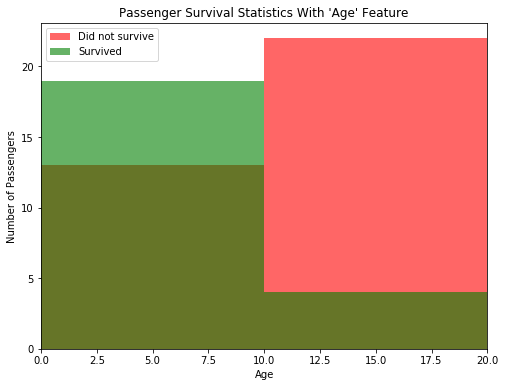

In [21]:
# Let's try new conditions!

vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Age < 18"])


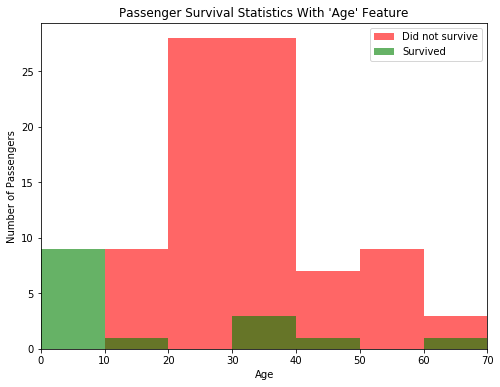

In [248]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", 'Pclass == 2'])


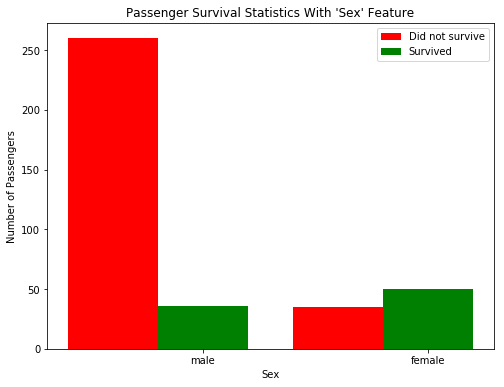

In [450]:
vs.survival_stats(data, outcomes, 'Sex', ['Pclass == 3', 'Parch == 0'])

In [475]:

def predictions_3(data):
    
    predictions = []

    for _, passenger in data.iterrows():
            
###This one improves a lot. 
        if passenger['Sex'] == 'female' and passenger['Pclass'] == 1:
            predictions.append(1)
        elif passenger['Sex'] == 'female' and passenger['Pclass'] == 2:
            predictions.append(1)
###


###1%
        elif passenger['Sex'] == 'female' and passenger['Pclass'] == 3 and passenger['Parch'] == 0:
            predictions.append(1)
###
            
        
###0.6%
        elif passenger['Sex'] == 'male' and passenger['Pclass'] == 3:
            predictions.append(0)
###


###0.7%
        elif passenger['Age'] <= 10 and passenger['Pclass'] == 2:
            predictions.append(1)
###    


###0.5%            
        elif passenger['Age'] <= 10 and passenger['Pclass' == 1] and passenger['Sex'] == 'male' and passenger['Parch'] == 2:
            predictions.append(1)
###



###unsignificant:
#         elif passenger['Sex'] == 'female' and passenger['Pclass'] == 3 and passenger['Parch'] == 2:
#             predictions.append(0)

#         elif passenger['Sex'] == 'male' and passenger['Fare'] <= 10:
#             predictions.append(0)
            
#         elif passenger['Sex'] == 'female' and passenger['Fare'] <= 10 and passenger['Age'] > 10:
#             predictions.append(0)
   
#         elif passenger['Sex'] == 'male' and passenger['Pclass'] == 2 and passenger['SibSp'] == 0:
#             predictions.append(0)
    
#         elif passenger['Sex'] == 'male' and passenger['Parch'] == 0:
#             predictions.append(0)

#         elif passenger['Sex'] == 'male' and passenger['Cabin'] == 'NaN' and passenger['SibSp'] == 0:
#             predictions.append(0)
        
#         elif passenger['Sex'] == 'male' and passenger['SibSp'] > 3:
#             predictions.append(0)

#         elif passenger['Sex'] == 'male' and passenger['Age'] >= 10:
#             predictions.append(0)

#         elif passenger['Sex'] == 'male' and passenger['Pclass'] == 2 and passenger['Age'] > 10:
#             predictions.append(0)
            
#         elif passenger['Sex'] == 'male' and passenger['Pclass'] ==1  and passenger['Age'] >= 20 and passenger['Age'] <= 40:
#             predictions.append(1)
            
#         elif passenger['Sex'] == 'female' and passenger['Fare'] >= 50:
#             predictions.append(1)
            
#         elif passenger['Sex'] == 'male' and passenger['SibSp'] == 0 and passenger['Pclass'] == 3:
#             predictions.append(0)

#         elif passenger['Embarked'] == 'S' and passenger['Pclass'] == 3:
#             predictions.append(0)
        
#         elif passenger['Embarked'] == 'Q' and passenger['Pclass'] == 3:
#             predictions.append(0)
            
#         elif passenger['Sex'] == 'male' and passenger['Age'] >= 10:
#             predictions.append(0)
            
#         elif passenger['Age'] <= 40 and passenger['Pclass' == 1] and passenger['Sex'] == 'male':
#             predictions.append(1)
    
#         elif passenger['Age'] <= 10 and passenger['Pclass' == 2] and passenger['Sex'] == 'male':
#             predictions.append(1)
        
#         elif passenger['Age'] <= 10 and passenger['Sex'] == 'male' and passenger['Parch'] == 0:
#             predictions.append(0)

#         elif passenger['Sex'] == 'female' and passenger['Age'] >= 10 and passenger['Pclass'] == 1 and passenger['SibSp'] == 0 and passenger['Parch'] == 0:
#             predictions.append(1)
        
#         elif passenger['Sex'] == 'female' and passenger['Pclass'] == 1 and passenger['Age']>= 10:
#             predictions.append(1)
            
#         elif passenger['Sex'] == 'female' and passenger['Pclass'] == 2:
#             predictions.append(1) 
            
#         elif passenger['Sex'] == 'male' and passenger['Pclass'] == 3 and passenger['Age']>= 40:
#             predictions.append(0) 
            
#         elif passenger['Age'] <= 10 and passenger['Pclass' == 1] and passenger['Sex'] == 'male'and passenger['Parch'] == 1:
#             predictions.append(1)

#         elif passenger['Age'] <= 10 and passenger['Pclass'] == 1 and passenger['Sex']== 'male':
#             predictions.append(1)

            


        else:
            predictions.append(0)
               
    return pd.Series(predictions) 

predictions = predictions_3(data)    


In [476]:
#Question4: 

In [477]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 81.59%


In [466]:
#Anser to the Question4: 
# ==> "Predictions have an accuracy of 81.59%"
#Made it.

# It was easy having 61% accuracy, and it wasn't hard to read 78%.
# It took a little more time to reach 79.91%, and then I took few more days to get 81.59%.

# From what I knwo about the story of the Titanic, roughly speaking, 
# women, children and rich dudes these people had higer rates of survial, so I use these as conditions to improve accuracy.

# I think 'Sex' is a key condition to seperate dataset and it worked well.
# However, 'Sex' alone wasn't enough, so I played it with other conditions.
# For most of the time, my tries were wasted, but persistance made sense lastly. 

# For most of the time, I went a dead way beacuse I didn't use many conditions to seperate out irrelavent conditions. 
# Therefore, my accuracy even got lower.
# I was all the way doing like, a manual 'DecsionTree', which really gave me a much better idea of how 'DecisionTree' performs.

# Pretty enjoyed. 


In [ ]:
# Question5: 


# Answer to the Question5:

# Predicting prices of houses is really fitting into supervised learning. 
# Outcome = the price of a house 
# features: location, size, year, number of bedrooms, decoration styles, community, schools, etc. 

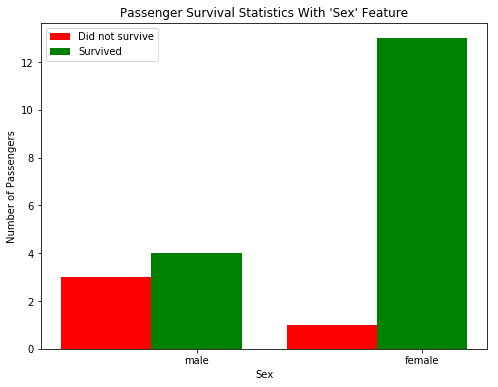

In [448]:
# Below are just helper graphs.
vs.survival_stats(data, outcomes, 'Sex', ['Age < 20', 'Pclass == 1'])

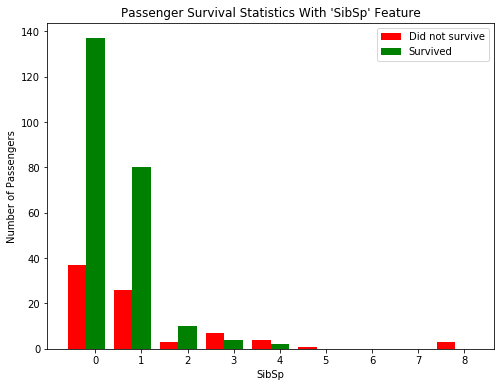

In [28]:
vs.survival_stats(data, outcomes, 'SibSp', ["Sex == 'female'"])

In [ ]:
# Reviews from Udacity:
    
# You may consider to look at other features to further enhance the model prediction accuracy:

# survival_stats(data, outcomes, 'Fare', ["Sex == 'female'"]) 
# survival_stats(data, outcomes, 'Embarked', ["Sex == 'female'"]) 
# survival_stats(data, outcomes, 'SibSp', ["Age < 10"]) 
# survival_stats(data, outcomes, 'Parch', ["Sex == 'female'"])
# Moreover, please look at the following code block for the logic that you could apply for the female passengers:

#            if (passenger['Embarked'] == "S" and passenger['Pclass'] == 3):
#                 predictions.append(0)
#             else:
#                 predictions.append(1)